# **Data load & preprocess**

The data was obtained from the following site: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

 There are two different typs of photos: "NORMAL" and "PNEUMONIA"

 "NORMAL", are the normal X-ray images of the chest without pneumonia
 
 "PNEUMONIA", are X-ray images of the chest with the pneumonia disease

### **_IMPORTS_**

In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

from torchvision import transforms, datasets
from torch.utils.data import DataLoader

### **_GET DATA_**

### _Image pre-processing_

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # I would use the model "ResNet", which expects 224x224 images.
    transforms.ToTensor(), # the images are converted to Pytroch-tensor 
])

### _Load Datasets_


we now have to classify each picture whether it corresponds to "NORMAL" or "PNEUMONIA"

0 = "NORMAL", 1 = "PNEUMONIA"

In [5]:
data_dir = "../data/chest_xray/"

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

In [6]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)





### **_VISUALIZATIONS_**

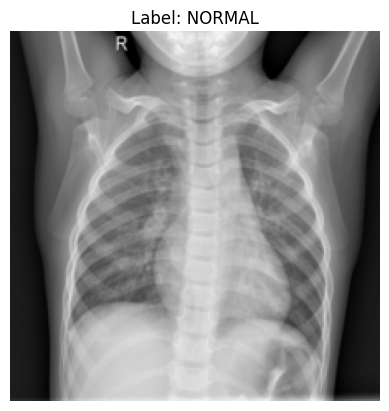

In [7]:
# first picture in train_dataset
image, label = train_dataset[0] 

# Change order (C, H, W → H, W, C)
image = image.permute(1, 2, 0).numpy()



plt.imshow(image)
plt.title("Label: NORMAL" if label == 0 else "Label: PNEUMONIA")
plt.axis('off')
plt.show()